<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#TODO" data-toc-modified-id="TODO-1">TODO</a></span></li></ul></div>

In [2]:
%matplotlib inline

In [3]:
import numpy as np
import pandas as pd

In [4]:
#import matplotlib.pyplot as plt

Let's define the maximum size of the x (width) and y (width) of our grid.

In [5]:
x_max = 9
y_max = 9

np.indices achieves the same 
~~as you'll see below using `np.mgrid` we get two arrays which we can use to create x,y pairs that describe the grid.~~

In [6]:
#y_mesh, x_mesh = np.mgrid[0:y_max, 0:x_max]
y_mesh, x_mesh = np.indices((y_max, x_max))
print(x_mesh)
print("")
print(y_mesh)

[[0 1 2 3 4 5 6 7 8]
 [0 1 2 3 4 5 6 7 8]
 [0 1 2 3 4 5 6 7 8]
 [0 1 2 3 4 5 6 7 8]
 [0 1 2 3 4 5 6 7 8]
 [0 1 2 3 4 5 6 7 8]
 [0 1 2 3 4 5 6 7 8]
 [0 1 2 3 4 5 6 7 8]
 [0 1 2 3 4 5 6 7 8]]

[[0 0 0 0 0 0 0 0 0]
 [1 1 1 1 1 1 1 1 1]
 [2 2 2 2 2 2 2 2 2]
 [3 3 3 3 3 3 3 3 3]
 [4 4 4 4 4 4 4 4 4]
 [5 5 5 5 5 5 5 5 5]
 [6 6 6 6 6 6 6 6 6]
 [7 7 7 7 7 7 7 7 7]
 [8 8 8 8 8 8 8 8 8]]


however we're drawing in pixels, assuming a fixed square pixel size per grid we'll call `tile_size`

In [7]:
tile_size = 64.0
tile_center = (tile_size / 2.0)

However 0 is going to be a problem for us, when calculating pixel distances so lets bump every up by 1.

Additionally we want to have the center value, so take the tile size and halve it.

In [8]:
x_mesh = (x_mesh +1) * tile_center
print(x_mesh)

[[  32.   64.   96.  128.  160.  192.  224.  256.  288.]
 [  32.   64.   96.  128.  160.  192.  224.  256.  288.]
 [  32.   64.   96.  128.  160.  192.  224.  256.  288.]
 [  32.   64.   96.  128.  160.  192.  224.  256.  288.]
 [  32.   64.   96.  128.  160.  192.  224.  256.  288.]
 [  32.   64.   96.  128.  160.  192.  224.  256.  288.]
 [  32.   64.   96.  128.  160.  192.  224.  256.  288.]
 [  32.   64.   96.  128.  160.  192.  224.  256.  288.]
 [  32.   64.   96.  128.  160.  192.  224.  256.  288.]]


In [9]:
y_mesh = (y_mesh +1) * tile_center
print(y_mesh)

[[  32.   32.   32.   32.   32.   32.   32.   32.   32.]
 [  64.   64.   64.   64.   64.   64.   64.   64.   64.]
 [  96.   96.   96.   96.   96.   96.   96.   96.   96.]
 [ 128.  128.  128.  128.  128.  128.  128.  128.  128.]
 [ 160.  160.  160.  160.  160.  160.  160.  160.  160.]
 [ 192.  192.  192.  192.  192.  192.  192.  192.  192.]
 [ 224.  224.  224.  224.  224.  224.  224.  224.  224.]
 [ 256.  256.  256.  256.  256.  256.  256.  256.  256.]
 [ 288.  288.  288.  288.  288.  288.  288.  288.  288.]]


If we want to get the individual items use the `ravel` function.

In [10]:
x_mesh.ravel()

array([  32.,   64.,   96.,  128.,  160.,  192.,  224.,  256.,  288.,
         32.,   64.,   96.,  128.,  160.,  192.,  224.,  256.,  288.,
         32.,   64.,   96.,  128.,  160.,  192.,  224.,  256.,  288.,
         32.,   64.,   96.,  128.,  160.,  192.,  224.,  256.,  288.,
         32.,   64.,   96.,  128.,  160.,  192.,  224.,  256.,  288.,
         32.,   64.,   96.,  128.,  160.,  192.,  224.,  256.,  288.,
         32.,   64.,   96.,  128.,  160.,  192.,  224.,  256.,  288.,
         32.,   64.,   96.,  128.,  160.,  192.,  224.,  256.,  288.,
         32.,   64.,   96.,  128.,  160.,  192.,  224.,  256.,  288.])

In [11]:
y_mesh.ravel()

array([  32.,   32.,   32.,   32.,   32.,   32.,   32.,   32.,   32.,
         64.,   64.,   64.,   64.,   64.,   64.,   64.,   64.,   64.,
         96.,   96.,   96.,   96.,   96.,   96.,   96.,   96.,   96.,
        128.,  128.,  128.,  128.,  128.,  128.,  128.,  128.,  128.,
        160.,  160.,  160.,  160.,  160.,  160.,  160.,  160.,  160.,
        192.,  192.,  192.,  192.,  192.,  192.,  192.,  192.,  192.,
        224.,  224.,  224.,  224.,  224.,  224.,  224.,  224.,  224.,
        256.,  256.,  256.,  256.,  256.,  256.,  256.,  256.,  256.,
        288.,  288.,  288.,  288.,  288.,  288.,  288.,  288.,  288.])

using numpy `dstack` to *Stack arrays in sequence depth wise (along third axis)* (https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.dstack.html) we get something looking like a grid.

In [12]:
# squeezing to remove empty arrays
pixel_center_positions = np.squeeze(np.dstack([y_mesh.ravel(), x_mesh.ravel()]))
pixel_center_positions

array([[  32.,   32.],
       [  32.,   64.],
       [  32.,   96.],
       [  32.,  128.],
       [  32.,  160.],
       [  32.,  192.],
       [  32.,  224.],
       [  32.,  256.],
       [  32.,  288.],
       [  64.,   32.],
       [  64.,   64.],
       [  64.,   96.],
       [  64.,  128.],
       [  64.,  160.],
       [  64.,  192.],
       [  64.,  224.],
       [  64.,  256.],
       [  64.,  288.],
       [  96.,   32.],
       [  96.,   64.],
       [  96.,   96.],
       [  96.,  128.],
       [  96.,  160.],
       [  96.,  192.],
       [  96.,  224.],
       [  96.,  256.],
       [  96.,  288.],
       [ 128.,   32.],
       [ 128.,   64.],
       [ 128.,   96.],
       [ 128.,  128.],
       [ 128.,  160.],
       [ 128.,  192.],
       [ 128.,  224.],
       [ 128.,  256.],
       [ 128.,  288.],
       [ 160.,   32.],
       [ 160.,   64.],
       [ 160.,   96.],
       [ 160.,  128.],
       [ 160.,  160.],
       [ 160.,  192.],
       [ 160.,  224.],
       [ 16

however for easier accessing for humans let's reshape the above,

In [13]:
map_pixel_center_positions = np.squeeze(np.reshape(pixel_center_positions, (y_max, x_max, 2)))
print(map_pixel_center_positions)
print("")

[[[  32.   32.]
  [  32.   64.]
  [  32.   96.]
  [  32.  128.]
  [  32.  160.]
  [  32.  192.]
  [  32.  224.]
  [  32.  256.]
  [  32.  288.]]

 [[  64.   32.]
  [  64.   64.]
  [  64.   96.]
  [  64.  128.]
  [  64.  160.]
  [  64.  192.]
  [  64.  224.]
  [  64.  256.]
  [  64.  288.]]

 [[  96.   32.]
  [  96.   64.]
  [  96.   96.]
  [  96.  128.]
  [  96.  160.]
  [  96.  192.]
  [  96.  224.]
  [  96.  256.]
  [  96.  288.]]

 [[ 128.   32.]
  [ 128.   64.]
  [ 128.   96.]
  [ 128.  128.]
  [ 128.  160.]
  [ 128.  192.]
  [ 128.  224.]
  [ 128.  256.]
  [ 128.  288.]]

 [[ 160.   32.]
  [ 160.   64.]
  [ 160.   96.]
  [ 160.  128.]
  [ 160.  160.]
  [ 160.  192.]
  [ 160.  224.]
  [ 160.  256.]
  [ 160.  288.]]

 [[ 192.   32.]
  [ 192.   64.]
  [ 192.   96.]
  [ 192.  128.]
  [ 192.  160.]
  [ 192.  192.]
  [ 192.  224.]
  [ 192.  256.]
  [ 192.  288.]]

 [[ 224.   32.]
  [ 224.   64.]
  [ 224.   96.]
  [ 224.  128.]
  [ 224.  160.]
  [ 224.  192.]
  [ 224.  224.]
  [ 224.  25

In [14]:
# fourth row 3rd column
print(map_pixel_center_positions[3][2])

[ 128.   96.]


In [15]:
# and the middle of our grid?
map_pixel_center_positions[4][4]

array([ 160.,  160.])

However to find a position based on pixel position we'll use the `scipy.spatial.KDTree` datatype. However it requires the data as an array of 2d arrays

In [16]:
#flat_grid = np.squeeze(np.reshape(pixel_positions.flatten(), (y_max, x_max, 2)))
flat_pixel_positions = pixel_center_positions.flatten()
len(flat_pixel_positions)

162

In [17]:
flat_pixel_positions = np.reshape(flat_pixel_positions, (int(len(flat_pixel_positions)/2),-1) )
flat_pixel_positions

array([[  32.,   32.],
       [  32.,   64.],
       [  32.,   96.],
       [  32.,  128.],
       [  32.,  160.],
       [  32.,  192.],
       [  32.,  224.],
       [  32.,  256.],
       [  32.,  288.],
       [  64.,   32.],
       [  64.,   64.],
       [  64.,   96.],
       [  64.,  128.],
       [  64.,  160.],
       [  64.,  192.],
       [  64.,  224.],
       [  64.,  256.],
       [  64.,  288.],
       [  96.,   32.],
       [  96.,   64.],
       [  96.,   96.],
       [  96.,  128.],
       [  96.,  160.],
       [  96.,  192.],
       [  96.,  224.],
       [  96.,  256.],
       [  96.,  288.],
       [ 128.,   32.],
       [ 128.,   64.],
       [ 128.,   96.],
       [ 128.,  128.],
       [ 128.,  160.],
       [ 128.,  192.],
       [ 128.,  224.],
       [ 128.,  256.],
       [ 128.,  288.],
       [ 160.,   32.],
       [ 160.,   64.],
       [ 160.,   96.],
       [ 160.,  128.],
       [ 160.,  160.],
       [ 160.,  192.],
       [ 160.,  224.],
       [ 16

Find an x,y position from the tree for the, lets call this the player position

In [276]:
# just right of the center
#player_rect_x = 192
player_rect_x = 220
player_rect_y = 160

In [277]:
from scipy.spatial import KDTree
tree = KDTree(flat_pixel_positions)

In [278]:
lookup_pixel_position = tree.query([player_rect_y, player_rect_x])
print(lookup_pixel_position)

(4.0, 42)


As per http://scipy.github.io/devdocs/generated/scipy.spatial.KDTree.query.html#scipy.spatial.KDTree.query

* `lookup_pixel_position[0]` - The distances to the nearest neighbors
* `lookup_pixel_position[1]` - The locations of the neighbors

In [279]:
player_pos = flat_pixel_positions[lookup_pixel_position[1]]
player_pos

array([ 160.,  224.])

for a given pixel position get the index position.

In [280]:
#  list comp was slower
# np.where([x[0] and x[1] for x in pixel_center_positions == player_pos])
np.where(np.all(pixel_center_positions == player_pos, axis = 1))

(array([42], dtype=int64),)

trying to replicate
```
        xpos = self.rect.centerx - SETTINGS.player_rect[0]
        ypos = SETTINGS.player_rect[1] - self.rect.centery
```

got some help from http://structure.usc.edu/numarray/node26.html about numpy slicing, basically the `:` means get all in the parent, and the number following says which element of the array in the parent array we want.

In [281]:
y_pos = flat_pixel_positions[:,0] - player_pos[0]
y_pos

array([-128., -128., -128., -128., -128., -128., -128., -128., -128.,
        -96.,  -96.,  -96.,  -96.,  -96.,  -96.,  -96.,  -96.,  -96.,
        -64.,  -64.,  -64.,  -64.,  -64.,  -64.,  -64.,  -64.,  -64.,
        -32.,  -32.,  -32.,  -32.,  -32.,  -32.,  -32.,  -32.,  -32.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         32.,   32.,   32.,   32.,   32.,   32.,   32.,   32.,   32.,
         64.,   64.,   64.,   64.,   64.,   64.,   64.,   64.,   64.,
         96.,   96.,   96.,   96.,   96.,   96.,   96.,   96.,   96.,
        128.,  128.,  128.,  128.,  128.,  128.,  128.,  128.,  128.])

In [282]:
xpos = flat_pixel_positions[:,1] - player_pos[1]
xpos

array([-192., -160., -128.,  -96.,  -64.,  -32.,    0.,   32.,   64.,
       -192., -160., -128.,  -96.,  -64.,  -32.,    0.,   32.,   64.,
       -192., -160., -128.,  -96.,  -64.,  -32.,    0.,   32.,   64.,
       -192., -160., -128.,  -96.,  -64.,  -32.,    0.,   32.,   64.,
       -192., -160., -128.,  -96.,  -64.,  -32.,    0.,   32.,   64.,
       -192., -160., -128.,  -96.,  -64.,  -32.,    0.,   32.,   64.,
       -192., -160., -128.,  -96.,  -64.,  -32.,    0.,   32.,   64.,
       -192., -160., -128.,  -96.,  -64.,  -32.,    0.,   32.,   64.,
       -192., -160., -128.,  -96.,  -64.,  -32.,    0.,   32.,   64.])

this is also a thing for distances:
dist = numpy.linalg.norm(a-b)

https://stackoverflow.com/questions/1401712/how-can-the-euclidean-distance-be-calculated-with-numpy#

In [283]:
dist = np.sqrt((xpos * xpos) + (ypos * ypos))
dist

array([ 230.75528163,  186.59046064,  143.10835056,  101.19288513,
         64.        ,   45.254834  ,   64.        ,  101.19288513,
        143.10835056,  230.75528163,  186.59046064,  143.10835056,
        101.19288513,   64.        ,   45.254834  ,   64.        ,
        101.19288513,  143.10835056,  230.75528163,  186.59046064,
        143.10835056,  101.19288513,   64.        ,   45.254834  ,
         64.        ,  101.19288513,  143.10835056,  230.75528163,
        186.59046064,  143.10835056,  101.19288513,   64.        ,
         45.254834  ,   64.        ,  101.19288513,  143.10835056,
        230.75528163,  186.59046064,  143.10835056,  101.19288513,
         64.        ,   45.254834  ,   64.        ,  101.19288513,
        143.10835056,  230.75528163,  186.59046064,  143.10835056,
        101.19288513,   64.        ,   45.254834  ,   64.        ,
        101.19288513,  143.10835056,  230.75528163,  186.59046064,
        143.10835056,  101.19288513,   64.        ,   45.25483

Now to calculate the theta for the tiles

In [322]:
def np_theta(x, y):
    return np.degrees(np.arctan2(y ,x) % (2 * np.pi))

In [323]:
theta = np_theta(xpos, ypos)
theta

array([ 269.53420681,  266.7499613 ,  272.10097169,  271.18335847,
        180.        ,   91.18335847,   92.10097169,   86.7499613 ,
         89.53420681,  269.53420681,  266.7499613 ,  272.10097169,
        271.18335847,  180.        ,   91.18335847,   92.10097169,
         86.7499613 ,   89.53420681,  269.53420681,  266.7499613 ,
        272.10097169,  271.18335847,  180.        ,   91.18335847,
         92.10097169,   86.7499613 ,   89.53420681,  269.53420681,
        266.7499613 ,  272.10097169,  271.18335847,  180.        ,
         91.18335847,   92.10097169,   86.7499613 ,   89.53420681,
        269.53420681,  266.7499613 ,  272.10097169,  271.18335847,
        180.        ,   91.18335847,   92.10097169,   86.7499613 ,
         89.53420681,  269.53420681,  266.7499613 ,  272.10097169,
        271.18335847,  180.        ,   91.18335847,   92.10097169,
         86.7499613 ,   89.53420681,  269.53420681,  266.7499613 ,
        272.10097169,  271.18335847,  180.        ,   91.18335

In [332]:
theta[41]

91.183358473478918

Let's visualise the grid, green is close, red is further away.

In [326]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

def grid_plot(data, colours = ['green','yellow','red']):
    # colour map
    my_cmap = mpl.colors.LinearSegmentedColormap.from_list(
        'my_colours',
        colours,
        256
    )

    # have to reshape into an array of 2d arrays
    img = plt.imshow(np.reshape(data, (y_max, x_max)), cmap = my_cmap)


    # make a color bar
    plt.colorbar(img, cmap = my_cmap)

    plt.show()

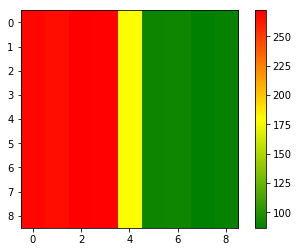

In [330]:
grid_plot(theta)

In [289]:
from scipy.spatial.distance import pdist, cosine, cdist
#cosine(player_pos, destination)

In [290]:
#pdist([player_pos, destination])

In [291]:
#pdist([player_pos, destination], "cosine")

find the distances from player to other places, assuming a tile size

In [292]:
from scipy.spatial.distance import pdist, cosine, cdist
tile_distances_from_player = cdist([player_pos], flat_pixel_positions)
tile_distances_from_player

array([[ 230.75528163,  204.8999756 ,  181.01933598,  160.        ,
         143.10835056,  131.93938002,  128.        ,  131.93938002,
         143.10835056,  214.66252584,  186.59046064,  160.        ,
         135.76450199,  115.37764081,  101.19288513,   96.        ,
         101.19288513,  115.37764081,  202.38577025,  172.32527383,
         143.10835056,  115.37764081,   90.50966799,   71.55417528,
          64.        ,   71.55417528,   90.50966799,  194.64840097,
         163.16862443,  131.93938002,  101.19288513,   71.55417528,
          45.254834  ,   32.        ,   45.254834  ,   71.55417528,
         192.        ,  160.        ,  128.        ,   96.        ,
          64.        ,   32.        ,    0.        ,   32.        ,
          64.        ,  194.64840097,  163.16862443,  131.93938002,
         101.19288513,   71.55417528,   45.254834  ,   32.        ,
          45.254834  ,   71.55417528,  202.38577025,  172.32527383,
         143.10835056,  115.37764081,   90.50966

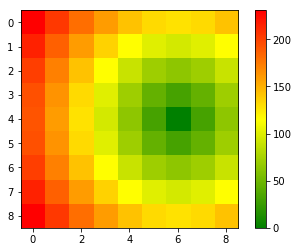

In [293]:
grid_plot(tile_distances_from_player)

Let's find positions with-in 3 tile distances, thinking about maximum render distance.

In [39]:
nearby_tile_distance = tile_distances_from_player <= tile_center * 2
print(nearby_tile_distance)

[[False False False False False False False False False False False False
  False False False False False False False False False False False  True
  False False False False False False False  True  True  True False False
  False False False  True  True  True  True  True False False False False
  False  True  True  True False False False False False False False  True
  False False False False False False False False False False False False
  False False False False False False False False False]]


and this is how we get the distance of the tiles